In [1]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import pickle 
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar


plt.rcParams["figure.figsize"] = (10,8)

import warnings
warnings.filterwarnings('ignore')
from datetime import datetime 

In [2]:
df = pd.read_csv("datos/bikes.csv", index_col=0)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
106,107,17-04-2018,summer,0,4,0,0,0,1,18.723347,22.28480,47.9583,20.334232,1558,2186,3744
557,558,12-07-2019,autumn,1,7,0,4,1,1,29.349153,32.73415,52.9583,9.833925,1032,6414,7446
653,654,16-10-2019,winter,1,10,0,2,1,1,19.201653,23.04230,55.8333,12.208807,922,6612,7534
690,691,22-11-2019,winter,1,11,1,4,0,1,13.940000,17.51855,58.0417,3.542344,955,1470,2425
722,723,24-12-2019,spring,1,12,0,1,1,2,9.483464,12.94500,79.1304,5.174437,174,746,920
112,113,23-04-2018,summer,0,4,0,6,0,2,18.860000,22.50605,88.7917,15.458575,1462,2574,4036
180,181,30-06-2018,autumn,0,6,0,4,1,1,28.563347,31.85040,43.4167,12.415904,1027,4488,5515
268,269,26-09-2018,winter,0,9,0,1,1,2,26.615847,29.45210,84.8333,7.416900,684,3946,4630
609,610,02-09-2019,autumn,1,9,0,0,0,2,28.563347,32.45000,81.5000,4.292744,2613,3197,5810
6,7,07-01-2018,spring,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510


In [4]:
df['dteday_year'] = df['dteday'].str.split('-', expand=True).get(2)
df_yr_0 = df[df['yr'] == 0]
df_yr_1 = df[df['yr'] == 1]
print(f'Los valores únicos de año de "dteday_year" para yr=0 (año 2018) son: {df_yr_0.dteday_year.unique()}')
print(f'Los valores únicos de año de "dteday_year" para yr=1 (año 2019) son: {df_yr_1.dteday_year.unique()}')

Los valores únicos de año de "dteday_year" para yr=0 (año 2018) son: ['2018']
Los valores únicos de año de "dteday_year" para yr=1 (año 2019) son: ['2019']


Los datos de la columna 'yr' son correctos.

In [5]:

# comprobamos que los datos de la columna 'mnth' son correctos
df['dteday_month'] = df['dteday'].str.split('-', expand=True).get(1)
for month in df['mnth'].unique():
    print(f'Los valores únicos de comprobación de "mnth" = {month} son: {df[df["mnth"] == month]["dteday_month"].unique()}')

Los valores únicos de comprobación de "mnth" = 1 son: ['01']
Los valores únicos de comprobación de "mnth" = 2 son: ['02']
Los valores únicos de comprobación de "mnth" = 3 son: ['03']
Los valores únicos de comprobación de "mnth" = 4 son: ['04']
Los valores únicos de comprobación de "mnth" = 5 son: ['05']
Los valores únicos de comprobación de "mnth" = 6 son: ['06']
Los valores únicos de comprobación de "mnth" = 7 son: ['07']
Los valores únicos de comprobación de "mnth" = 8 son: ['08']
Los valores únicos de comprobación de "mnth" = 9 son: ['09']
Los valores únicos de comprobación de "mnth" = 10 son: ['10']
Los valores únicos de comprobación de "mnth" = 11 son: ['11']
Los valores únicos de comprobación de "mnth" = 12 son: ['12']


Los datos de la columna 'mnth' son correctos.

In [6]:
# eliminamos las columnas que hemos creado tan solo para comprobar las columnas 'yr' y 'mnth'
df.drop(columns=['dteday_year', 'dteday_month'], inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(2)
memory usage: 97.0+ KB


convertimos 'dteday' a datetime

In [8]:
df['dteday'] = pd.to_datetime(df['dteday'], format= '%d-%m-%Y')

In [9]:
df.sample(20)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
442,443,2019-03-19,spring,1,3,0,1,1,1,22.345000,26.64105,72.8750,10.875239,982,5171,6153
491,492,2019-05-07,summer,1,5,0,1,1,2,22.037500,26.35710,66.4167,15.458307,1008,5265,6273
476,477,2019-04-22,summer,1,4,0,0,0,3,16.263347,19.47520,83.5417,23.084582,120,907,1027
69,70,2018-03-11,spring,0,3,0,5,1,2,12.977402,15.25000,64.9565,15.608990,247,1730,1977
320,321,2018-11-17,winter,0,11,0,4,1,2,14.008347,16.16105,57.5833,20.459254,139,2914,3053
616,617,2019-09-09,autumn,1,9,0,0,0,1,25.010000,28.94625,54.7500,15.041232,2570,5657,8227
444,445,2019-03-21,summer,1,3,0,3,1,2,21.798347,25.66290,82.1250,6.000406,1122,5108,6230
541,542,2019-06-26,autumn,1,6,0,2,1,1,25.864153,29.73520,37.3333,23.292014,1077,6365,7442
406,407,2019-02-11,spring,1,2,0,6,0,3,9.190847,10.54335,73.1250,19.416332,192,1977,2169
649,650,2019-10-12,winter,1,10,0,5,1,1,17.937500,21.65355,53.9167,15.751164,1060,6222,7282


corregimos la columna 'seasons'

In [10]:
def estaciones(dato):

    primavera = np.union1d(pd.date_range(start= '2018-03-21', end='2018-06-21'), pd.date_range(start= '2019-03-21', end='2019-06-21'))
    verano = np.union1d(pd.date_range(start= '2018-06-22', end='2018-09-22'), pd.date_range(start= '2019-06-22', end='2019-09-22'))
    otoño = np.union1d(pd.date_range(start= '2018-09-23', end='2018-12-21'), pd.date_range(start= '2019-09-23', end='2019-12-21'))
    invierno = np.union1d(pd.date_range(start= '2018-12-22', end='2018-03-20'), pd.date_range(start= '2019-12-22', end='2019-03-20'))

    if dato in primavera:
        return 'spring'
    elif dato in verano:
        return 'summer'
    elif dato in otoño:
        return 'autumn'
    else:
        return 'winter'

In [11]:
df['season'] = df['dteday'].apply(estaciones)

In [12]:
df.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            720, 721, 722, 723, 724, 725, 726, 727, 728, 729],
           dtype='int64', length=730)

In [13]:
def exploracion(dataframe):
    '''
    Función que nos permite explorar varios aspectos de un dataframe mostrando
    unas filas, el numero de filas y columnas, los tipos de datos, la cantidad de nulos por columna,
    la cantidad de filas duplicadas, y los principales estadísticos.
        Parametros:
                dataframe (dataframe): un dataframe que queremos explorar
                nombre (string): un titulo para el dataframe
    '''
    print(".............................................")
    print(f"En el dataframe hay {dataframe.shape[0]} filas y {dataframe.shape[1]} columnas.")
    print(".............................................")
    print(f"5 filas aleatorias:")
    display(dataframe.sample(5))
    print(".............................................")
    print(f"Los tipos de data por columna del dataframe son:")
    display(dataframe.dtypes.reset_index())
    print(".............................................")
    print(f"La cantidad de nulos por columna del dataframe son:")
    display(dataframe.isnull().sum().reset_index())
    print(".............................................")
    print(f"El porcentaje de nulos por columna del dataframe son:")
    display(dataframe.isnull().sum() * 100 / dataframe.shape[0])
    print(".............................................")
    if dataframe.duplicated().sum() != 0:
        print(f"En el dataframe hay {dataframe.duplicated().sum()} filas duplicadas.")
    else:
        print(f"No hay filas duplicadas.")
    print(".............................................")
    print(f"Los principales estadísticos de las columnas numéricas son:")
    display(dataframe.describe().T)
    print(".............................................")
    print(f"Los principales estadísticos de las columnas categóricas son:")
    display(dataframe.describe(include=object).T)
    print(".............................................")

In [14]:
exploracion(df)

.............................................
En el dataframe hay 730 filas y 16 columnas.
.............................................
5 filas aleatorias:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
719,720,2019-12-21,autumn,1,12,0,5,1,2,13.393347,15.08835,55.6667,25.083661,221,3402,3623
346,347,2018-12-13,autumn,0,12,0,2,1,1,11.582500,15.05690,59.0000,9.416850,155,3368,3523
536,537,2019-06-21,spring,1,6,0,4,1,1,33.039153,37.62710,56.7917,7.958729,778,5127,5905
265,266,2018-09-23,autumn,0,9,0,5,1,2,24.975847,26.10625,97.2500,5.250569,258,2137,2395
289,290,2018-10-17,autumn,0,10,0,1,1,1,21.900847,25.53625,57.9583,11.750393,713,3857,4570


.............................................
Los tipos de data por columna del dataframe son:


,index,0
0,instant,int64
1,dteday,datetime64[ns]
2,season,object
3,yr,int64
4,mnth,int64
5,holiday,int64
6,weekday,int64
7,workingday,int64
8,weathersit,int64
9,temp,float64


.............................................
La cantidad de nulos por columna del dataframe son:


,index,0
0,instant,0
1,dteday,0
2,season,0
3,yr,0
4,mnth,0
5,holiday,0
6,weekday,0
7,workingday,0
8,weathersit,0
9,temp,0


.............................................
El porcentaje de nulos por columna del dataframe son:


instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

.............................................
No hay filas duplicadas.
.............................................
Los principales estadísticos de las columnas numéricas son:


,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800
hum,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000


.............................................
Los principales estadísticos de las columnas categóricas son:


,count,unique,top,freq
season,730,4,spring,186


.............................................


Tras ver el análisis hemos decidido prescindir de las columnas instant y cnt 

In [15]:
df.drop(['instant', 'cnt'], axis=1, inplace=True)

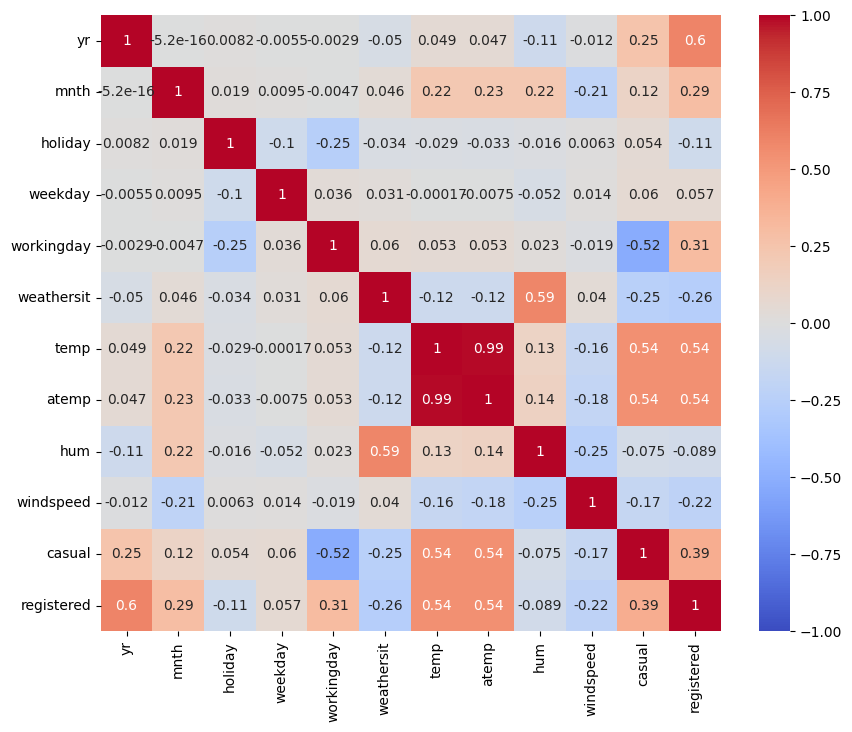

In [16]:
sns.heatmap(df.corr(), annot=True, vmin= -1, vmax=1, cmap='coolwarm');

In [17]:
mask = np.triu(np.ones_like(df.corr(),dtype = np.bool_))

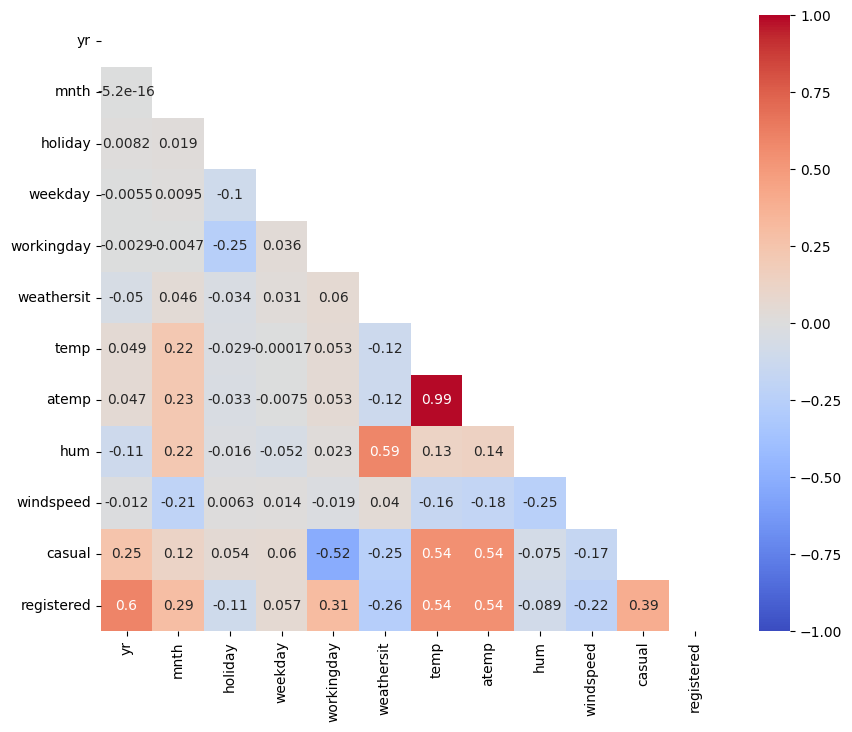

In [18]:
sns.heatmap(df.corr(),
             cmap = 'coolwarm',
             annot = True,
             mask = mask,
             vmin = -1,
             vmax= 1);

Puesto que temp y atemp tienen una correlación muy alta (cercana a 1), hemos decidido prescindir de la de atemp (sensación térmica). La correlación de las dos con nuestras variables respuesta es igual. 

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    int64         
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    int64         
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    int64         
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(8), object(1)
memory usage: 85.5+ KB


In [20]:
nuevas_columnas = {'dteday' : 'date', 'yr' : 'year', 'mnth': 'month', 'weathersit': 'weather'}

In [21]:
df.rename(columns= nuevas_columnas, inplace=True)

In [22]:
df.drop(['atemp'], axis=1, inplace=True)

corregimos la columna 'holiday'

In [23]:
festivos = df[df['holiday'] == 1]
festivos

,date,season,year,month,holiday,weekday,workingday,weather,temp,hum,windspeed,casual,registered
16,2018-01-17,winter,0,1,1,1,0,2,7.209153,53.7500,12.999139,117,883
51,2018-02-21,winter,0,2,1,1,0,2,12.436653,60.5000,20.625682,195,912
104,2018-04-15,spring,0,4,1,5,0,1,18.313347,67.1250,15.167125,642,2484
149,2018-05-30,spring,0,5,1,1,0,1,30.066653,68.5000,8.792075,1549,2549
184,2018-07-04,summer,0,7,1,1,0,2,29.793347,63.7917,5.459106,3065,2978
247,2018-09-05,summer,0,9,1,1,0,2,27.606653,79.0417,14.250632,1236,2115
282,2018-10-10,autumn,0,10,1,1,0,1,23.404153,73.3750,2.834381,1514,3603
314,2018-11-11,autumn,0,11,1,5,0,1,13.290847,44.6250,21.083225,440,2928
327,2018-11-24,autumn,0,11,1,4,0,1,15.306653,54.9167,11.209368,560,935
359,2018-12-26,winter,0,12,1,1,0,1,13.191299,50.6957,16.044155,430,887


In [24]:
festivos.shape

(21, 13)

In [25]:
cal = calendar() #llamada al calendario
holidays = cal.holidays(start=df['date'].min(), end=df['date'].max())

df['holiday'] = df['date'].isin(holidays)

In [26]:
festivos = df[df['holiday'] ==  True]
festivos

,date,season,year,month,holiday,weekday,workingday,weather,temp,hum,windspeed,casual,registered
0,2018-01-01,winter,0,1,True,6,0,2,14.110847,80.5833,10.749882,331,654
14,2018-01-15,winter,0,1,True,6,0,2,9.566653,49.8750,10.583521,222,1026
49,2018-02-19,winter,0,2,True,6,0,1,16.365847,18.7917,34.000021,532,1103
147,2018-05-28,spring,0,5,True,6,0,1,26.889153,72.9583,15.416164,2001,2757
184,2018-07-04,summer,0,7,True,1,0,2,29.793347,63.7917,5.459106,3065,2978
245,2018-09-03,summer,0,9,True,6,0,1,27.435847,71.6667,12.416775,1935,2549
280,2018-10-08,autumn,0,10,True,6,0,1,21.388347,70.1250,3.042081,2235,3174
315,2018-11-12,autumn,0,11,True,6,0,1,14.623347,55.2917,14.208154,1275,2792
325,2018-11-22,autumn,0,11,True,2,1,3,17.083347,96.2500,7.959064,69,1538
358,2018-12-25,winter,0,12,True,0,0,1,11.266103,68.1304,10.391097,303,451


In [27]:
festivos.shape

(20, 13)

In [28]:
mapa = {True: 'Holiday', False: 'Not Holiday'}
df['holiday'] = df['holiday'].map(mapa)

In [29]:
df.sample(10)

,date,season,year,month,holiday,weekday,workingday,weather,temp,hum,windspeed,casual,registered
532,2019-06-17,spring,1,6,Not Holiday,0,0,1,24.292500,59.8750,9.708568,2634,4344
558,2019-07-13,summer,1,7,Not Holiday,5,1,2,29.998347,48.5833,5.416950,1511,5988
703,2019-12-05,autumn,1,12,Not Holiday,3,1,1,17.971653,48.5000,21.709407,331,5398
0,2018-01-01,winter,0,1,Holiday,6,0,2,14.110847,80.5833,10.749882,331,654
636,2019-09-29,autumn,1,9,Not Holiday,6,0,1,22.242500,54.2917,15.249468,2589,5966
715,2019-12-17,autumn,1,12,Not Holiday,1,1,2,16.126653,90.7083,6.583306,212,4373
404,2019-02-09,winter,1,2,Not Holiday,4,1,1,10.865000,56.2083,13.000479,163,3667
160,2018-06-10,spring,0,6,Not Holiday,5,1,1,30.955000,60.5000,9.417118,815,3771
635,2019-09-28,autumn,1,9,Not Holiday,5,1,2,25.385847,69.0000,10.999993,1045,6370
721,2019-12-23,winter,1,12,Not Holiday,0,0,1,10.079153,51.5417,8.916561,408,1379


corregimos la columna 'weekday'

In [30]:
df["weekday"]= df["date"].dt.day_name()

In [31]:
df.sample(10)

,date,season,year,month,holiday,weekday,workingday,weather,temp,hum,windspeed,casual,registered
134,2018-05-15,spring,0,5,Not Holiday,Tuesday,0,2,23.062500,86.7083,10.249593,1582,2971
101,2018-04-12,spring,0,4,Not Holiday,Thursday,1,2,20.602500,73.9167,18.416893,257,1777
376,2019-01-12,winter,1,1,Not Holiday,Saturday,1,2,15.682500,80.2917,12.124789,269,3828
388,2019-01-24,winter,1,1,Not Holiday,Thursday,1,1,14.042500,83.5833,8.292389,439,3900
728,2019-12-30,winter,1,12,Not Holiday,Monday,0,1,10.489153,48.3333,23.500518,364,1432
615,2019-09-08,summer,1,9,Not Holiday,Sunday,0,2,27.025847,79.9167,18.833968,1557,4419
139,2018-05-20,spring,0,5,Not Holiday,Sunday,1,1,22.003347,71.9583,8.375871,909,4008
219,2018-08-08,summer,0,8,Not Holiday,Wednesday,1,1,31.365000,59.2083,12.875725,846,3480
265,2018-09-23,autumn,0,9,Not Holiday,Sunday,1,2,24.975847,97.2500,5.250569,258,2137
448,2019-03-25,spring,1,3,Not Holiday,Monday,0,2,17.937500,88.0833,14.791925,1532,3464


### corregimos la columnas 'workingday'

In [32]:
# separamos en un dataframe los días laborables (workingday' = 1)
df_wd_1 = df[df['workingday'] == 1]
# separamos en un dataframe los fines de semana y festivos (workingday' = 0)
df_wd_0 = df[df['workingday'] == 0]
# comprobamos que en fines de semana y festivos solo salgan weekda:
print(f'Comprobamos que para "workingday" = 1 (días laborables) los valores únicos de weekday deberían ser L-V (Monday,Tuesday,Wednesday,Thursday,Friday) y son: {df_wd_1["weekday"].unique()}')
print(f'Comprobamos que para "workingday" = 1 (días laborables) el valor único de holiday debería se NO festivo (False) y es: {df_wd_1["holiday"].unique()}')
# comprobamos que en fines de semana y festivos solo salgan weekda:
print(f'Comprobamos que para "workingday" = 0 (findes y festivos), si filtramos por "holiday" = 0 (NO festivos), los valores únicos de weekday deberían ser sab-dom (Saturday,Sunday) y son: {df_wd_0[df_wd_0["holiday"] == 0]["weekday"].unique()}')

Comprobamos que para "workingday" = 1 (días laborables) los valores únicos de weekday deberían ser L-V (Monday,Tuesday,Wednesday,Thursday,Friday) y son: ['Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday' 'Tuesday']
Comprobamos que para "workingday" = 1 (días laborables) el valor único de holiday debería se NO festivo (False) y es: ['Not Holiday' 'Holiday']
Comprobamos que para "workingday" = 0 (findes y festivos), si filtramos por "holiday" = 0 (NO festivos), los valores únicos de weekday deberían ser sab-dom (Saturday,Sunday) y son: []


La columnas 'workingday' no es correcta

In [33]:
def laborables(dato):
    laborables = pd.date_range(start= '2018-01-01', end='2019-12-31', freq='B')
    if dato in laborables:
        return 'Workingday'
    else:
        return 'Weekend or holiday'

In [34]:
df['workingday'] = df['date'].apply(laborables)

In [35]:
df.head(15)

,date,season,year,month,holiday,weekday,workingday,weather,temp,hum,windspeed,casual,registered
0,2018-01-01,winter,0,1,Holiday,Monday,Workingday,2,14.110847,80.5833,10.749882,331,654
1,2018-01-02,winter,0,1,Not Holiday,Tuesday,Workingday,2,14.902598,69.6087,16.652113,131,670
2,2018-01-03,winter,0,1,Not Holiday,Wednesday,Workingday,1,8.050924,43.7273,16.636703,120,1229
3,2018-01-04,winter,0,1,Not Holiday,Thursday,Workingday,1,8.200000,59.0435,10.739832,108,1454
4,2018-01-05,winter,0,1,Not Holiday,Friday,Workingday,1,9.305237,43.6957,12.522300,82,1518
5,2018-01-06,winter,0,1,Not Holiday,Saturday,Weekend or holiday,1,8.378268,51.8261,6.000868,88,1518
6,2018-01-07,winter,0,1,Not Holiday,Sunday,Weekend or holiday,2,8.057402,49.8696,11.304642,148,1362
7,2018-01-08,winter,0,1,Not Holiday,Monday,Workingday,2,6.765000,53.5833,17.875868,68,891
8,2018-01-09,winter,0,1,Not Holiday,Tuesday,Workingday,1,5.671653,43.4167,24.250650,54,768
9,2018-01-10,winter,0,1,Not Holiday,Wednesday,Workingday,1,6.184153,48.2917,14.958889,41,1280


In [36]:
df['workingday'].value_counts()

Workingday            522
Weekend or holiday    208
Name: workingday, dtype: int64

In [37]:
# corregimos los festivos, que en la columna 'workingday_ok' deberán tener valor 0.
df.loc[df["holiday"] == 1, "workingday"] = 'Weekend or Holiday'

In [38]:
df['workingday'].value_counts()

Workingday            522
Weekend or holiday    208
Name: workingday, dtype: int64

In [39]:
df.head(15)

,date,season,year,month,holiday,weekday,workingday,weather,temp,hum,windspeed,casual,registered
0,2018-01-01,winter,0,1,Holiday,Monday,Workingday,2,14.110847,80.5833,10.749882,331,654
1,2018-01-02,winter,0,1,Not Holiday,Tuesday,Workingday,2,14.902598,69.6087,16.652113,131,670
2,2018-01-03,winter,0,1,Not Holiday,Wednesday,Workingday,1,8.050924,43.7273,16.636703,120,1229
3,2018-01-04,winter,0,1,Not Holiday,Thursday,Workingday,1,8.200000,59.0435,10.739832,108,1454
4,2018-01-05,winter,0,1,Not Holiday,Friday,Workingday,1,9.305237,43.6957,12.522300,82,1518
5,2018-01-06,winter,0,1,Not Holiday,Saturday,Weekend or holiday,1,8.378268,51.8261,6.000868,88,1518
6,2018-01-07,winter,0,1,Not Holiday,Sunday,Weekend or holiday,2,8.057402,49.8696,11.304642,148,1362
7,2018-01-08,winter,0,1,Not Holiday,Monday,Workingday,2,6.765000,53.5833,17.875868,68,891
8,2018-01-09,winter,0,1,Not Holiday,Tuesday,Workingday,1,5.671653,43.4167,24.250650,54,768
9,2018-01-10,winter,0,1,Not Holiday,Wednesday,Workingday,1,6.184153,48.2917,14.958889,41,1280


guardamos los datos

In [40]:
df.to_csv('datos/bikes_clean.csv')

In [41]:
df.to_pickle('datos/bikes_clean_pickle.pkl')

In [42]:
df.head()

,date,season,year,month,holiday,weekday,workingday,weather,temp,hum,windspeed,casual,registered
0,2018-01-01,winter,0,1,Holiday,Monday,Workingday,2,14.110847,80.5833,10.749882,331,654
1,2018-01-02,winter,0,1,Not Holiday,Tuesday,Workingday,2,14.902598,69.6087,16.652113,131,670
2,2018-01-03,winter,0,1,Not Holiday,Wednesday,Workingday,1,8.050924,43.7273,16.636703,120,1229
3,2018-01-04,winter,0,1,Not Holiday,Thursday,Workingday,1,8.200000,59.0435,10.739832,108,1454
4,2018-01-05,winter,0,1,Not Holiday,Friday,Workingday,1,9.305237,43.6957,12.522300,82,1518


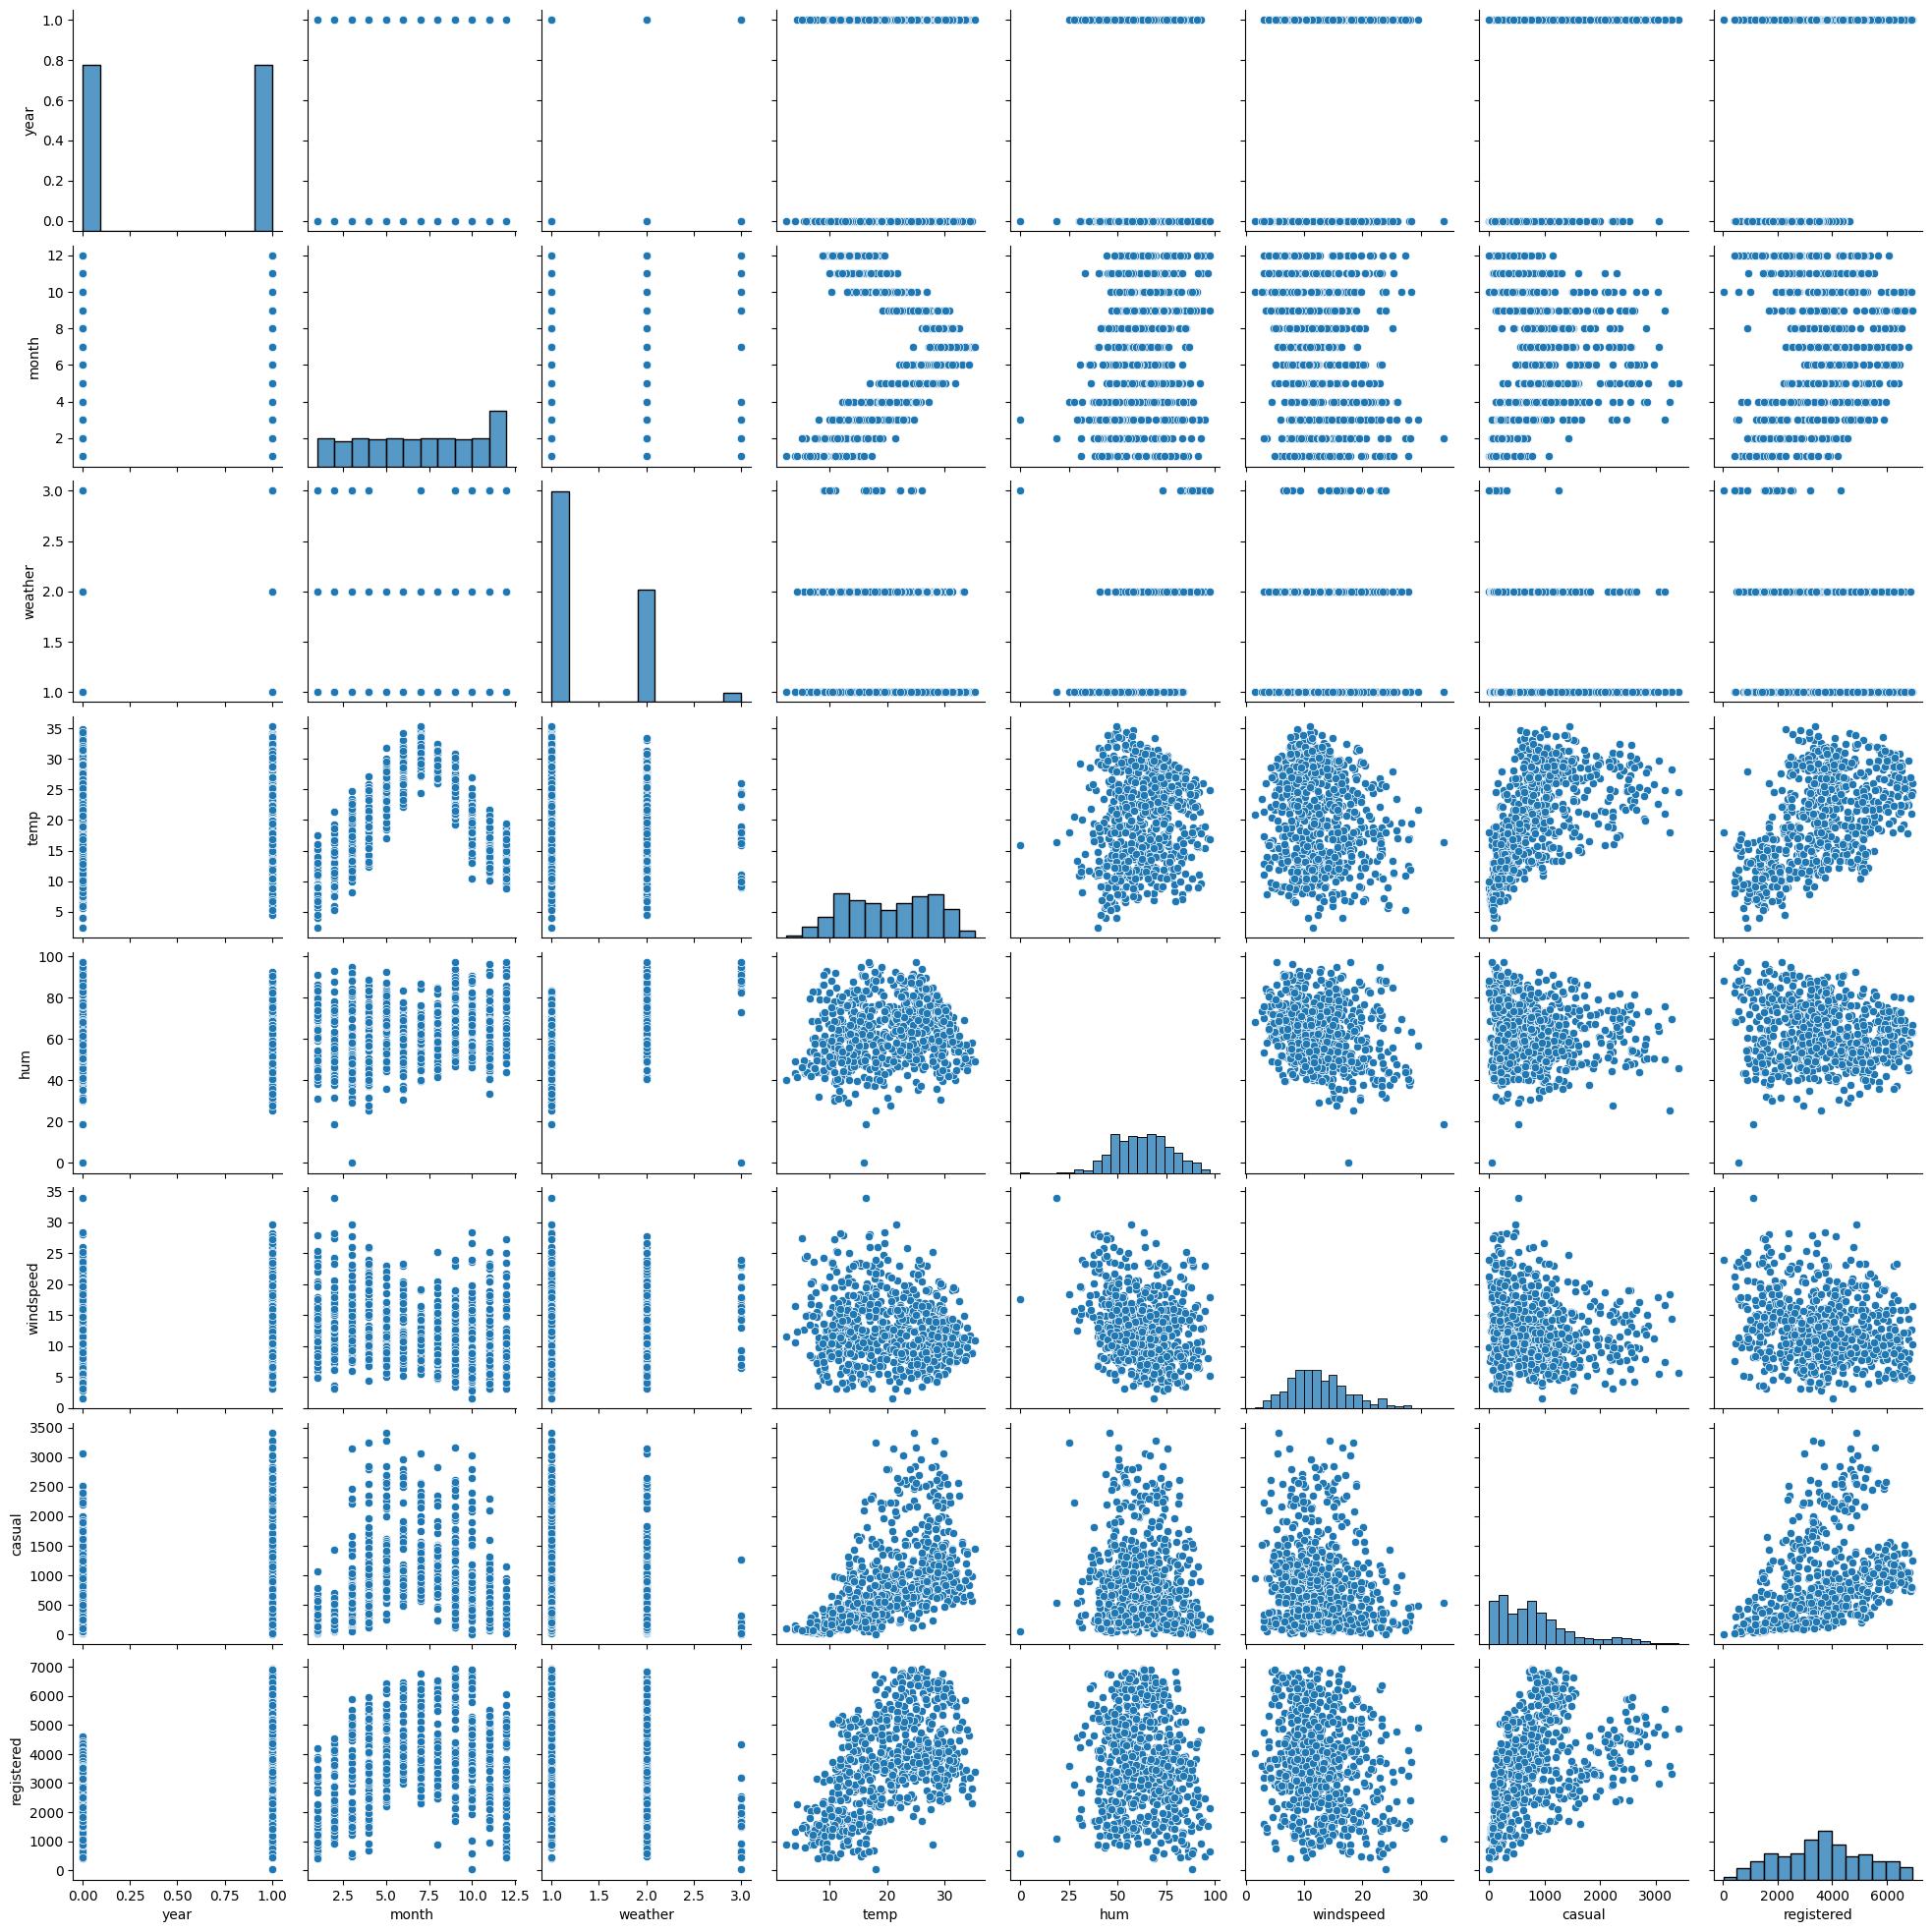

In [43]:
sns.pairplot(df)

In [44]:
df_numericas = df.select_dtypes(include=np.number)
df_categoricas = df.select_dtypes(include='object')

In [45]:
df.head()

,date,season,year,month,holiday,weekday,workingday,weather,temp,hum,windspeed,casual,registered
0,2018-01-01,winter,0,1,Holiday,Monday,Workingday,2,14.110847,80.5833,10.749882,331,654
1,2018-01-02,winter,0,1,Not Holiday,Tuesday,Workingday,2,14.902598,69.6087,16.652113,131,670
2,2018-01-03,winter,0,1,Not Holiday,Wednesday,Workingday,1,8.050924,43.7273,16.636703,120,1229
3,2018-01-04,winter,0,1,Not Holiday,Thursday,Workingday,1,8.200000,59.0435,10.739832,108,1454
4,2018-01-05,winter,0,1,Not Holiday,Friday,Workingday,1,9.305237,43.6957,12.522300,82,1518


In [46]:
df.columns

Index(['date', 'season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather', 'temp', 'hum', 'windspeed', 'casual', 'registered'],
      dtype='object')

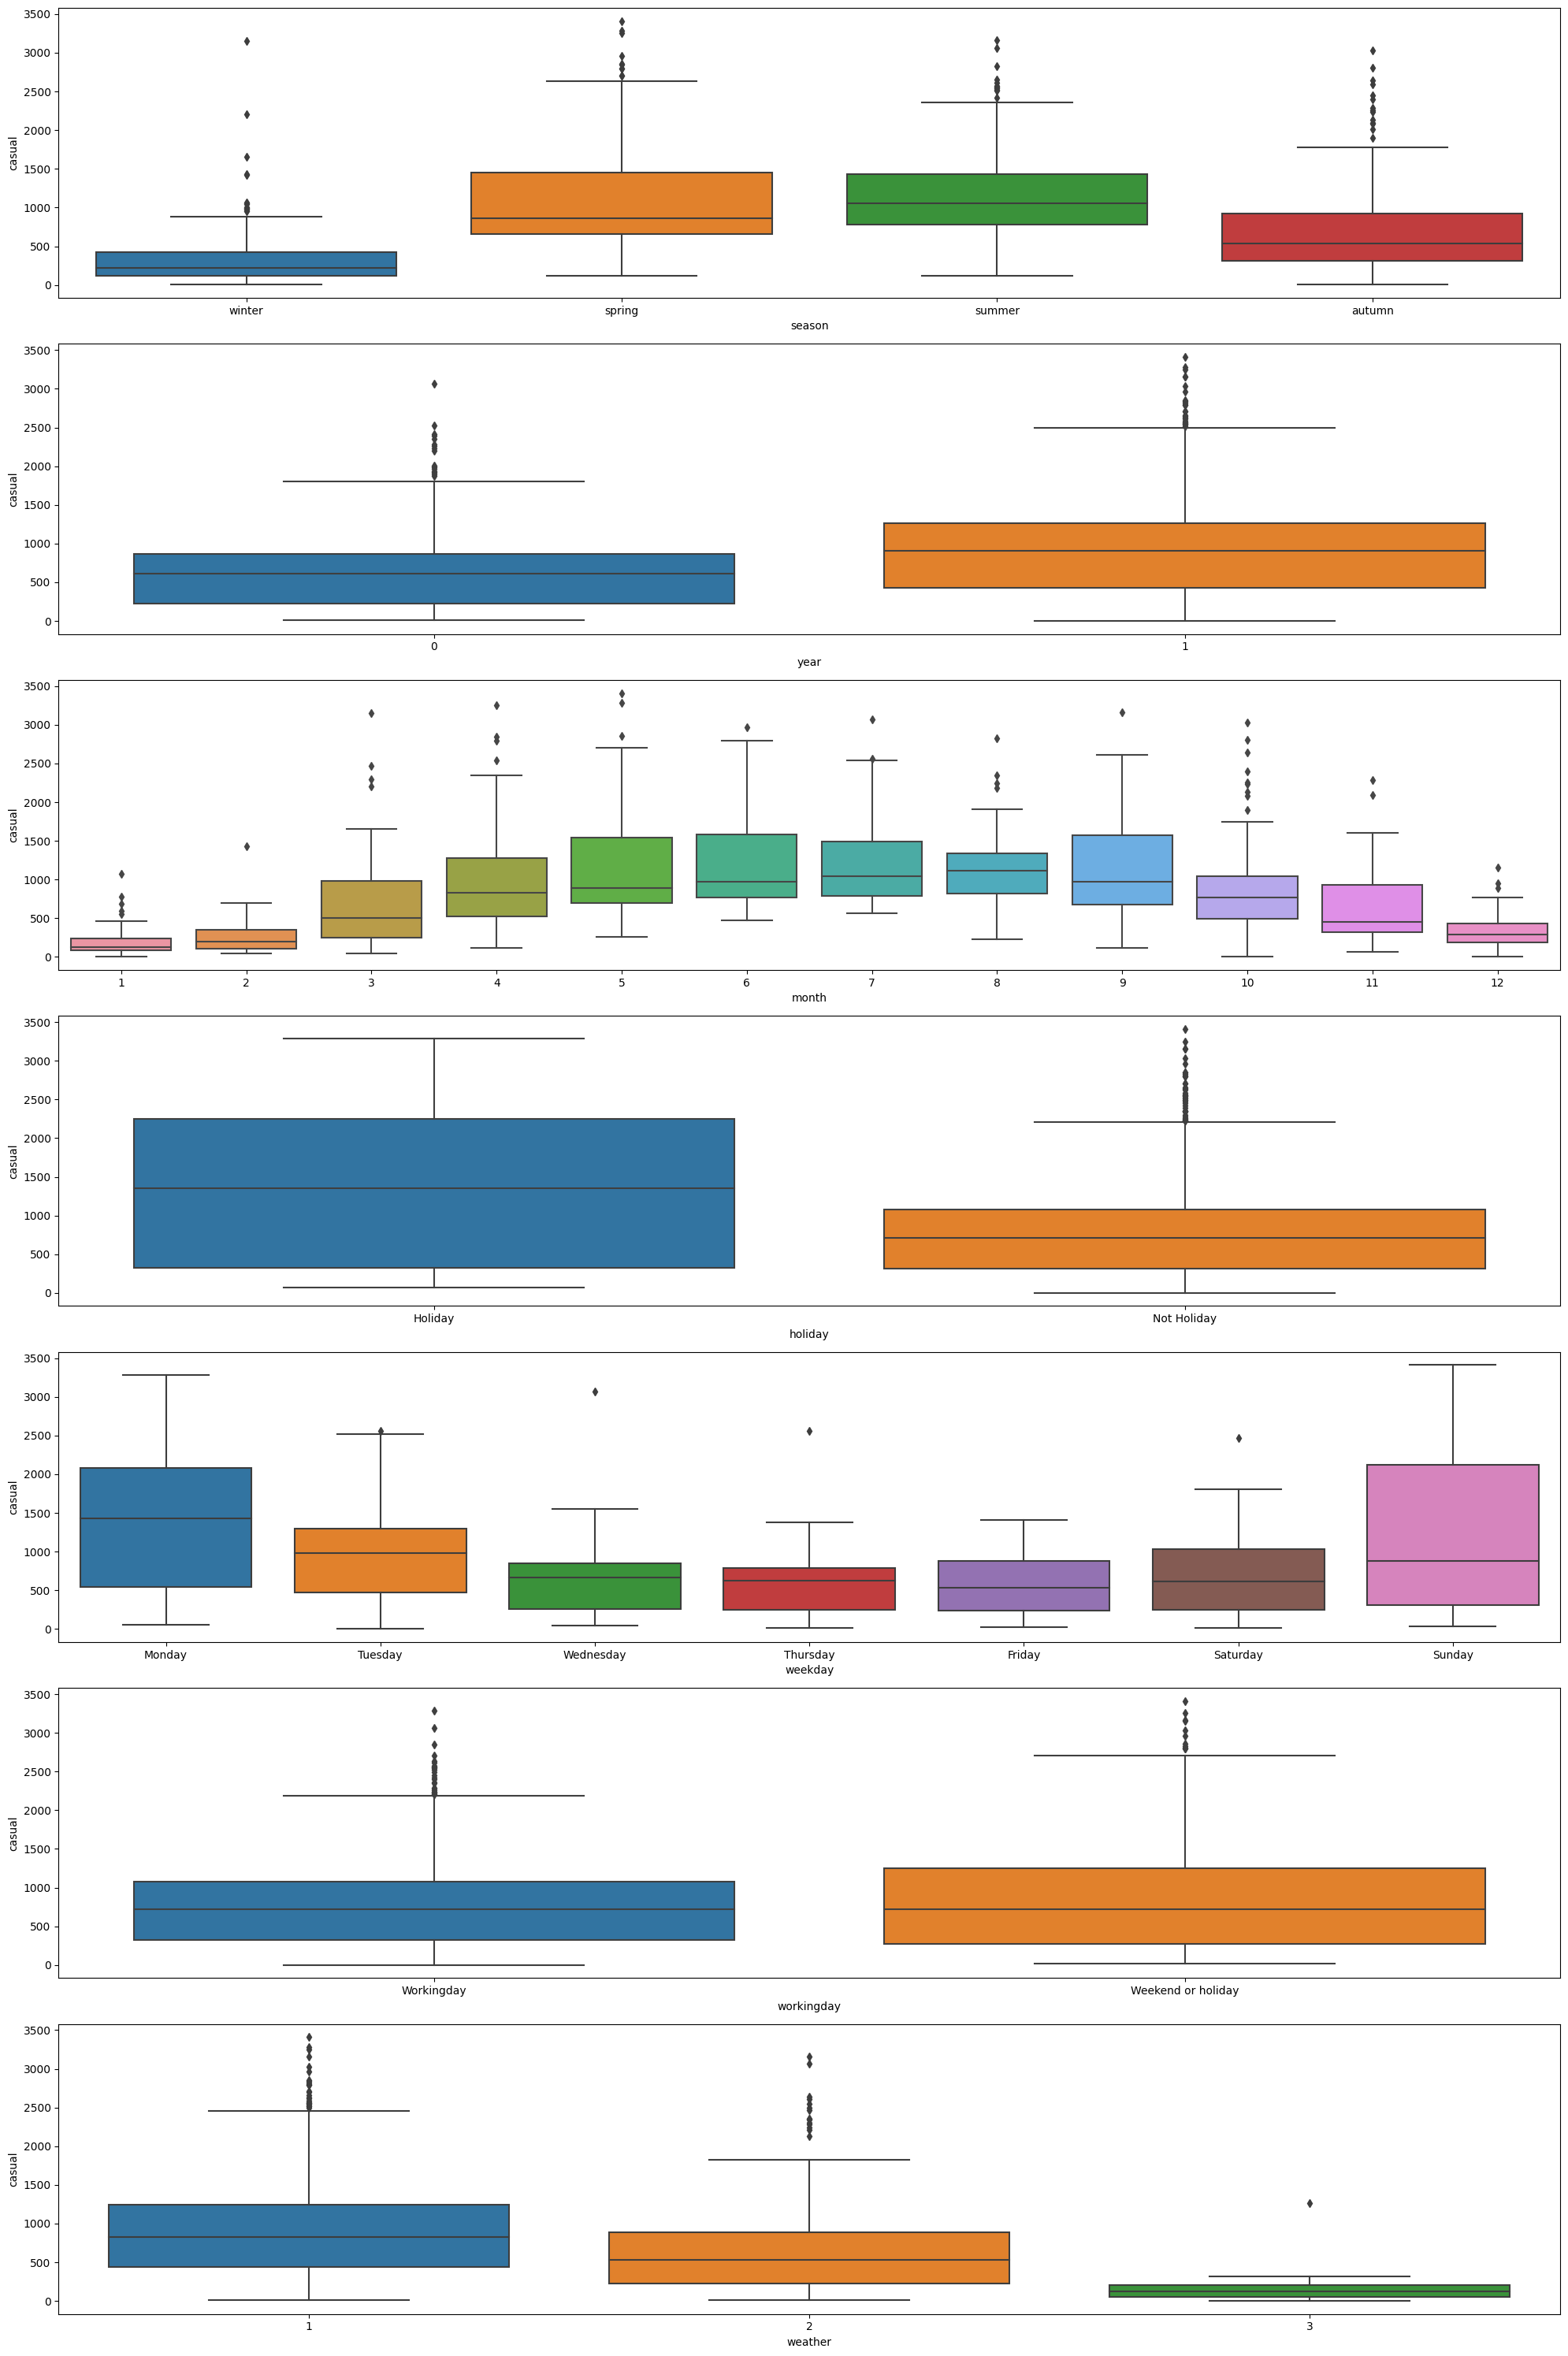

In [47]:
lista_categoricas = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather']

fig, axes = plt.subplots(7, 1, figsize = (20, 30))

axes = axes.flat

for i, columna in enumerate(lista_categoricas):
    sns.boxplot(x=df[columna], y = df["casual"], data = df, ax = axes[i])
    
plt.tight_layout()
plt.show();

In [48]:
df['weather'].unique()

array([2, 1, 3])

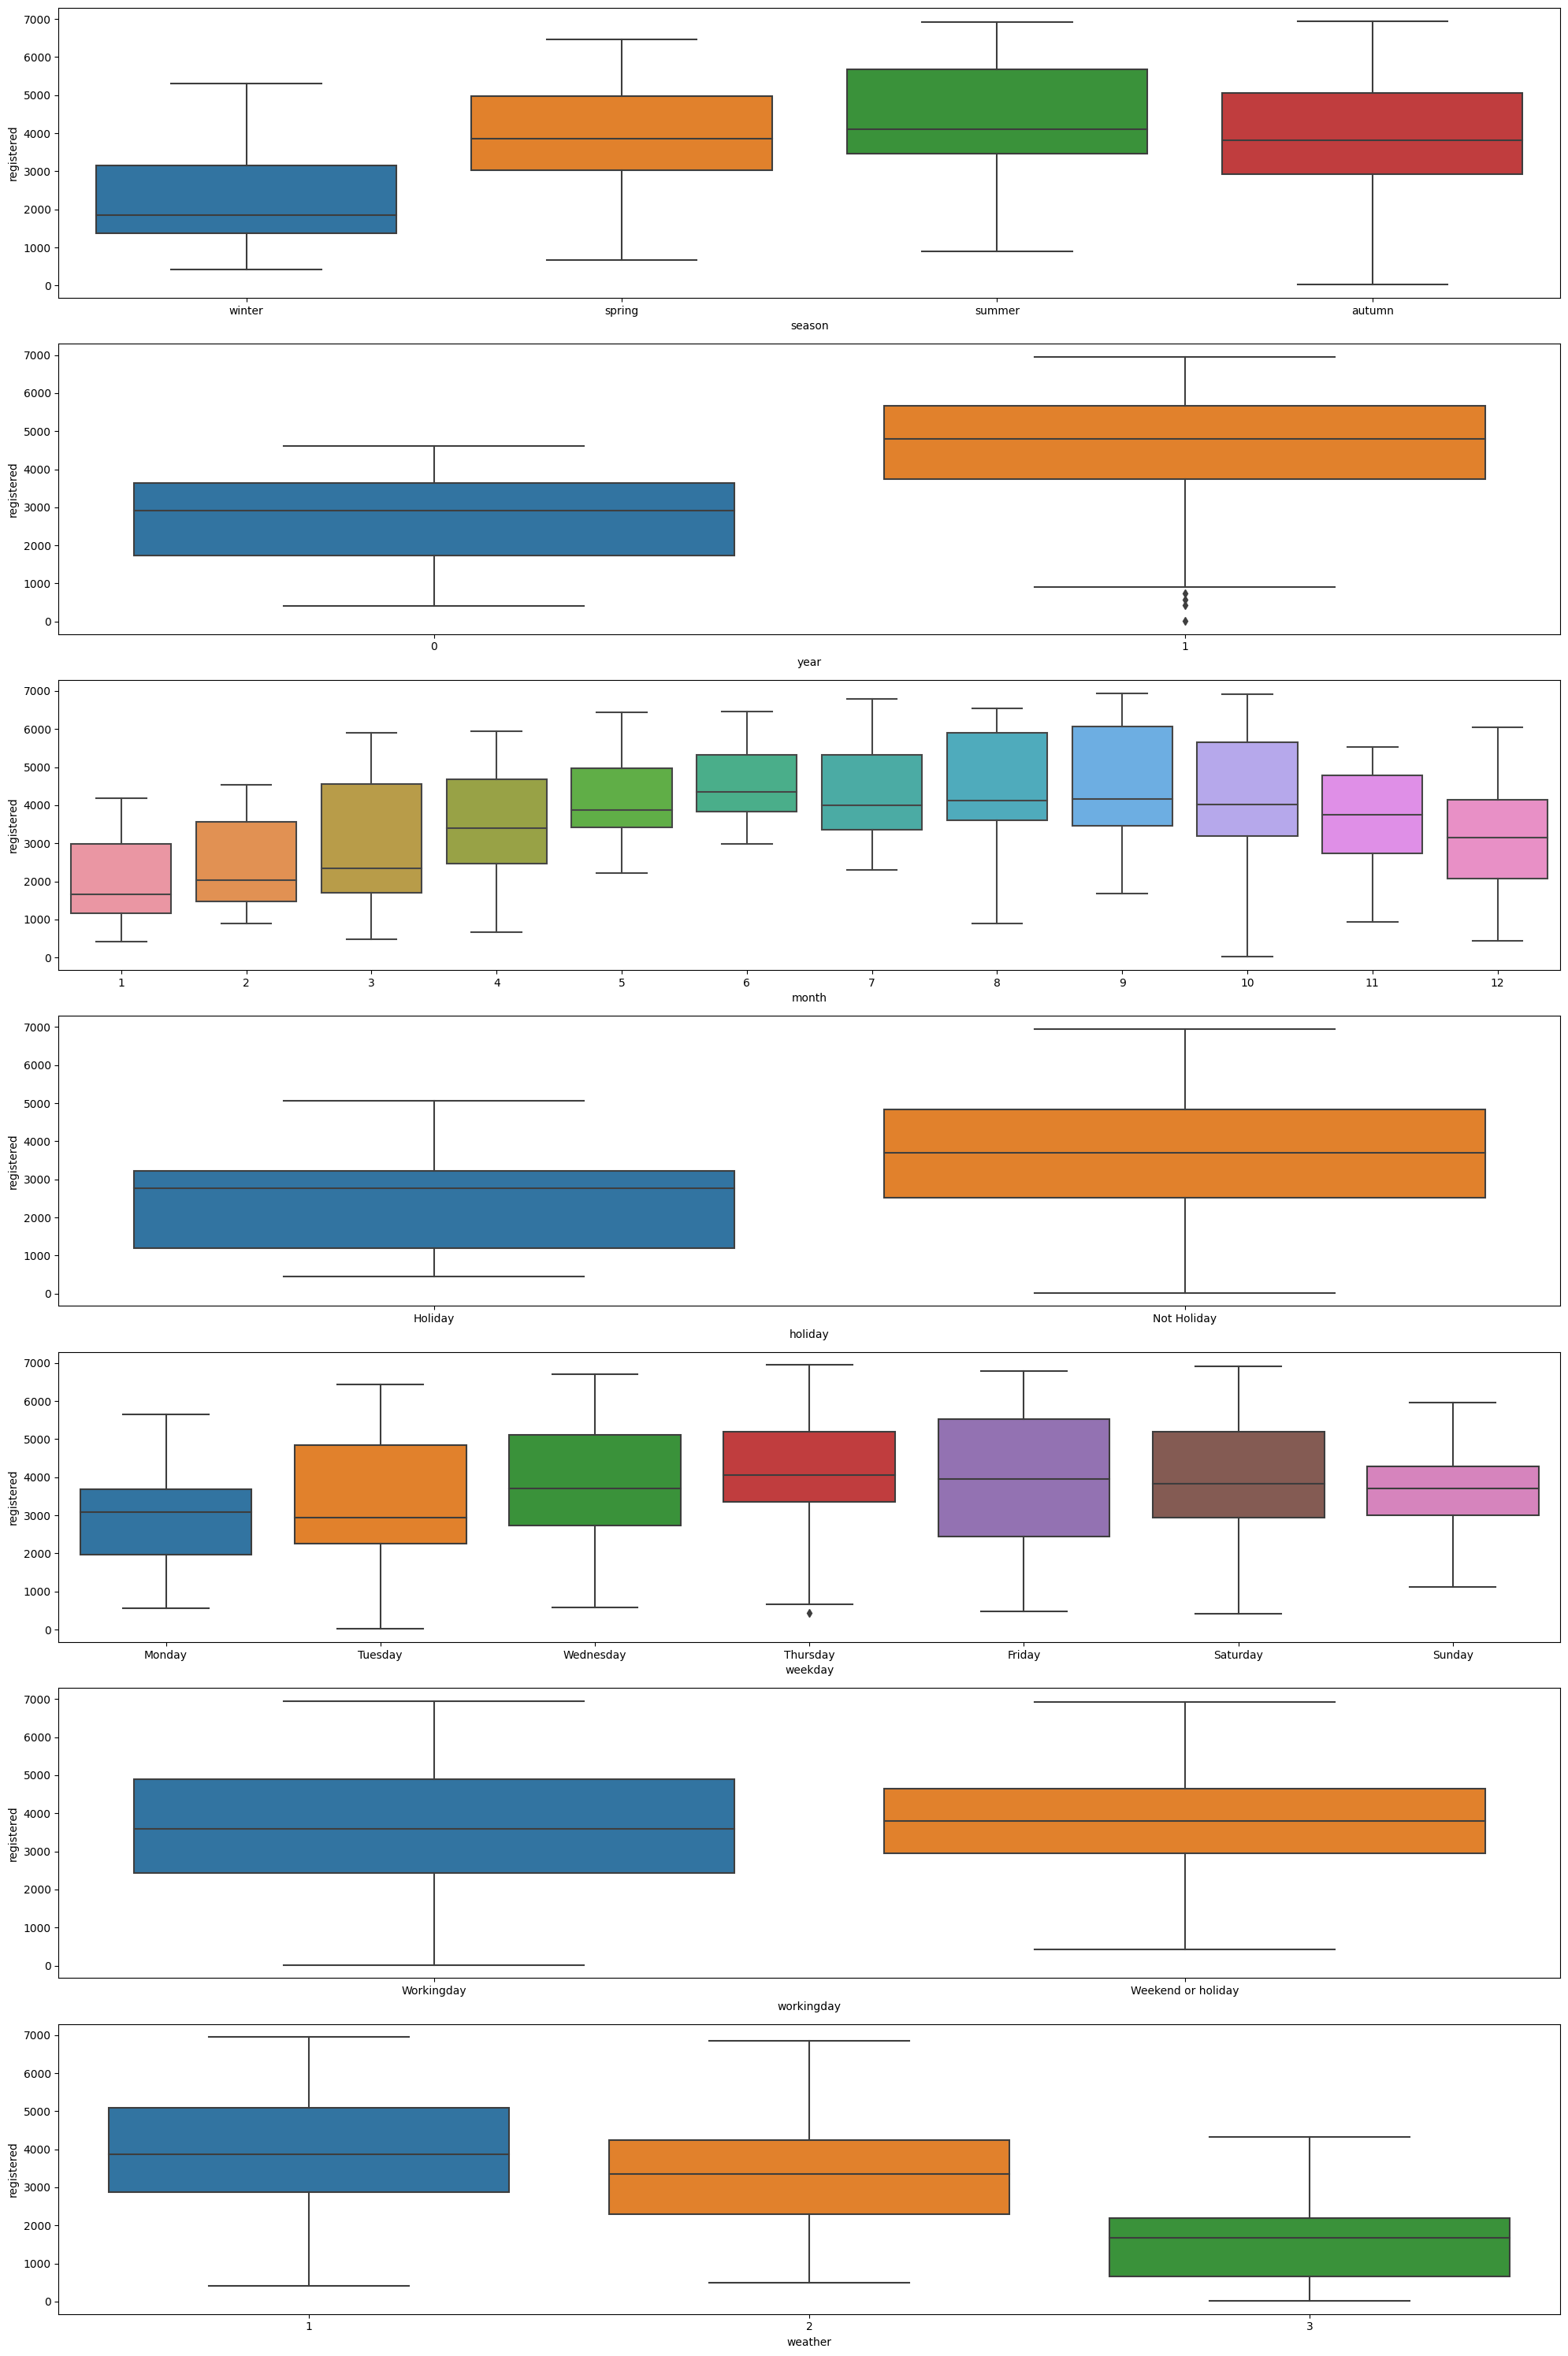

In [49]:
fig, axes = plt.subplots(7, 1, figsize = (20, 30))

axes = axes.flat

for i, columna in enumerate(lista_categoricas):
    sns.boxplot(x=df[columna], y = df["registered"], data = df, ax = axes[i])
    
plt.tight_layout()
plt.show();

In [50]:
df_numericas.head()

,year,month,weather,temp,hum,windspeed,casual,registered
0,0,1,2,14.110847,80.5833,10.749882,331,654
1,0,1,2,14.902598,69.6087,16.652113,131,670
2,0,1,1,8.050924,43.7273,16.636703,120,1229
3,0,1,1,8.200000,59.0435,10.739832,108,1454
4,0,1,1,9.305237,43.6957,12.522300,82,1518


In [51]:
df_numericas.drop(['year', 'month', 'weather'], axis= 1, inplace=True)

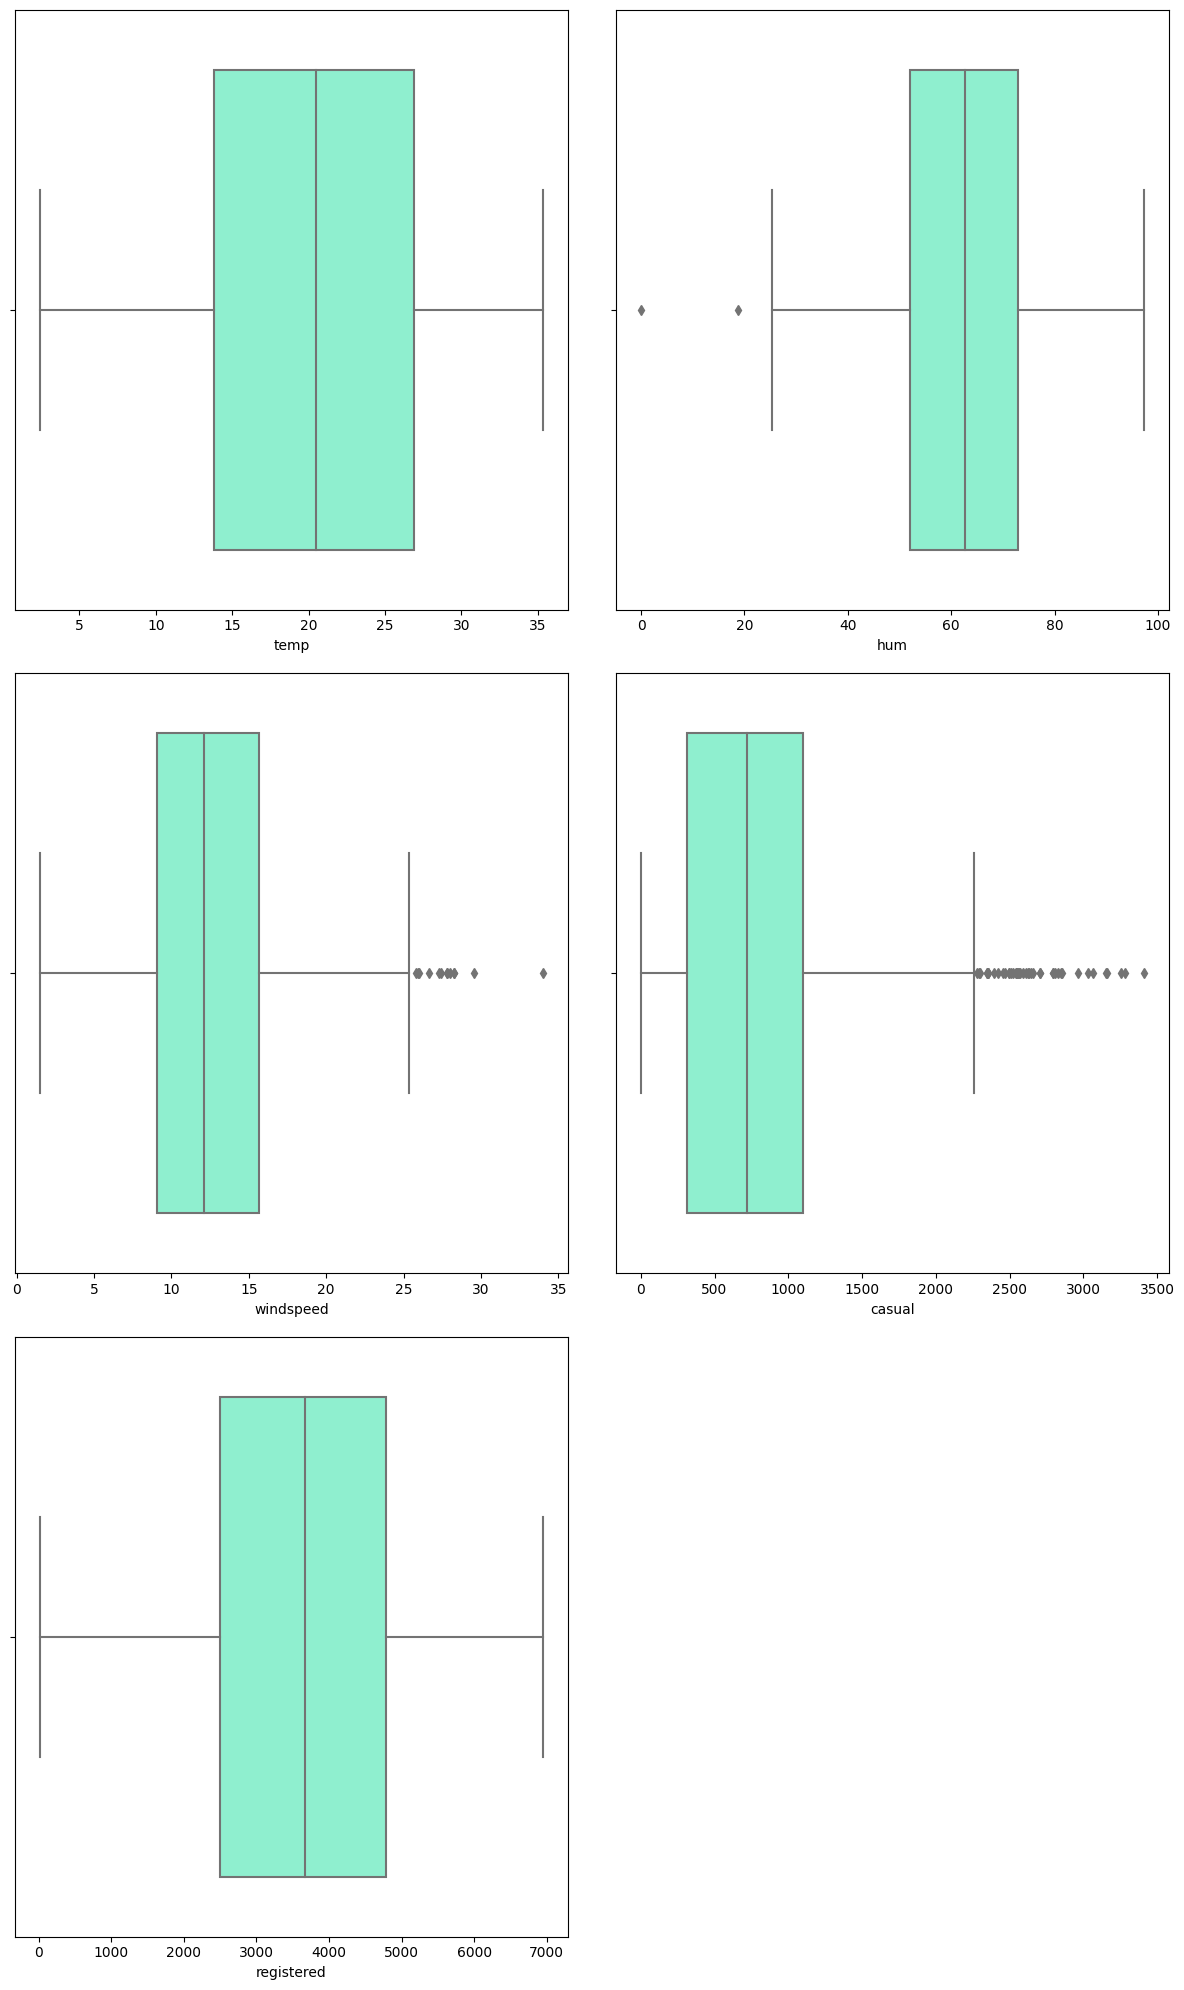

In [52]:
fig, axes = plt.subplots(3, 2, figsize=(12, 20))

axes = axes.flat

for indice, columna in enumerate(df_numericas.columns):
    # para trazar una línea de densidad
    sns.boxplot(x=df_numericas[columna], data=df_numericas,
                ax=axes[indice], color="aquamarine")


plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()

In [53]:
df_numericas.columns

Index(['temp', 'hum', 'windspeed', 'casual', 'registered'], dtype='object')

In [54]:
def detectar_outliers(lista_columnas, dataframe):
    dicc_indices = {}
    df = pd.DataFrame()
    for col in lista_columnas:
        Q1 = np.percentile(dataframe[col], 25)
        Q3 = np.percentile(dataframe[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outliers_data = dataframe[(dataframe[col] < (Q1 - outlier_step)) | (dataframe[col] > (Q3 + outlier_step))]
        df = pd.concat([df, outliers_data], axis=0)
        if outliers_data.shape[0] > 0:
            dicc_indices[col] = (list(outliers_data.index))
    return df, dicc_indices

In [55]:
df_outliers, ind_outliers = detectar_outliers(df_numericas.columns, df)

In [56]:
# Los índices de los outliers son:
ind_outliers 

{'hum': [49, 68],
 'windspeed': [44, 49, 93, 94, 292, 382, 407, 420, 431, 432, 449, 665, 720],
 'casual': [148,
  183,
  184,
  196,
  246,
  281,
  440,
  446,
  454,
  455,
  461,
  468,
  469,
  475,
  489,
  496,
  503,
  504,
  510,
  511,
  512,
  517,
  518,
  524,
  531,
  532,
  538,
  539,
  549,
  559,
  567,
  580,
  594,
  608,
  609,
  616,
  622,
  629,
  630,
  636,
  643,
  657,
  664,
  679]}

In [57]:
df_outliers.duplicated().sum()

1

In [58]:
# borramos los duplicados del dataframe de outliers para explorarlos mejor
df_outliers.drop_duplicates(inplace=True)
df_outliers

,date,season,year,month,holiday,weekday,workingday,weather,temp,hum,windspeed,casual,registered
49,2018-02-19,winter,0,2,Holiday,Monday,Workingday,1,16.365847,18.7917,34.000021,532,1103
68,2018-03-10,winter,0,3,Not Holiday,Saturday,Weekend or holiday,3,15.952731,0.0000,17.545759,46,577
44,2018-02-14,winter,0,2,Not Holiday,Wednesday,Workingday,1,17.015000,37.5833,27.999836,208,1705
93,2018-04-04,spring,0,4,Not Holiday,Wednesday,Workingday,1,23.506653,42.6250,25.833257,734,2381
94,2018-04-05,spring,0,4,Not Holiday,Thursday,Workingday,2,16.980847,64.2083,26.000489,167,1628
292,2018-10-20,autumn,0,10,Not Holiday,Saturday,Weekend or holiday,1,19.509153,63.6250,28.292425,471,3724
382,2019-01-18,winter,1,1,Not Holiday,Friday,Workingday,1,12.436653,44.3333,27.833743,109,3267
407,2019-02-12,winter,1,2,Not Holiday,Tuesday,Workingday,1,5.227500,46.4583,27.417204,73,1456
420,2019-02-25,winter,1,2,Not Holiday,Monday,Workingday,1,11.924153,39.5833,28.250014,317,2415
431,2019-03-08,winter,1,3,Not Holiday,Friday,Workingday,1,21.627500,56.7500,29.584721,486,4896


In [59]:
# sacamos los estadísticos principales de las columnas numéricas para comparar los valores de los outliers con ellos
df_numericas.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
hum,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000
windspeed,730.0,12.763620,5.195841,1.500244,9.041650,12.125325,15.625589,34.000021
casual,730.0,849.249315,686.479875,2.000000,316.250000,717.000000,1096.500000,3410.000000
registered,730.0,3658.757534,1559.758728,20.000000,2502.250000,3664.500000,4783.250000,6946.000000
